In [1]:
import mlflow
runs = mlflow.search_runs(experiment_ids=["0"])

In [ ]:
runs.columns

In [ ]:
from collections import Counter

c = Counter(runs['tags.max_accuracy'])
c.most_common()

In [ ]:
runs[['metrics.wasserstein_score',
      'metrics.pmse_score',
      'params.wasserstein_epsilon', 
      'params.pmse_epsilon', 
      'params.wasserstein_synthesizer', 
      'params.pmse_synthesizer']]

In [ ]:
runs[['metrics.wasserstein_score',
      'params.wasserstein_epsilon', 
      'params.wasserstein_synthesizer',
     'tags.wasserstein_dataset']]

In [23]:
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import conf

def gen_plot_dict(runs, x, y, series, dataset, x_label, y_label):
    """
    Will produce a accuracy-by-epsilon graph from an artifact.json
    file.
    """
    metrics = runs[[x,y,series,dataset]]
    # print(metrics)
    plot_dict = {}
    
    for index, row in metrics.iterrows():
        if row[series] not in plot_dict:
            plot_dict[row[series]] = []
        if row[x] and row[y]:
            plot_dict[row[series]].append((float(row[x]),float(row[y]), row[dataset]))
    
    # print(plot_dict)
    return plot_dict

def gen_scatter_plot(plot_dict, plot_index, title, label_dict):
    colors = ['--r','--b','--g', '--c', '--m', '--y', 'r', 'b', 'g', 'c', 'm', 'y']
    plt.figure(figsize=(12,8))
    for i, series in enumerate(plot_dict):
        X = {}
        Y = {}
        points = plot_dict[series]
        points.sort(key=lambda x: x[0])
        for x, y, d in points:
            if d not in X:
                X[d] = []
            if d not in Y:
                Y[d] = []
            X[d].append(x)
            Y[d].append(y)
        for j, d in enumerate(X):
            if series:
                plt.plot(X[d], Y[d], colors[j+i % len(colors)], label = series + '_' + d)
    plt.xscale("log")
    plt.legend()
    plt.title(title)
    plt.xlabel(label_dict['x_label'])
    plt.ylabel(label_dict['y_label'])
    plt.figure(plot_index)
    plt.show()

def make_plots(runs, plots):
    for i, p in enumerate(plots):
        plot_dict = gen_plot_dict(runs, **plots[p])
        gen_scatter_plot(plot_dict, i, p, plots[p])

In [24]:
runs['tags.dataset']

0      adult
1      adult
2      adult
3      adult
4      adult
       ...  
190     None
191     None
192     None
193     None
194    adult
Name: tags.dataset, Length: 195, dtype: object

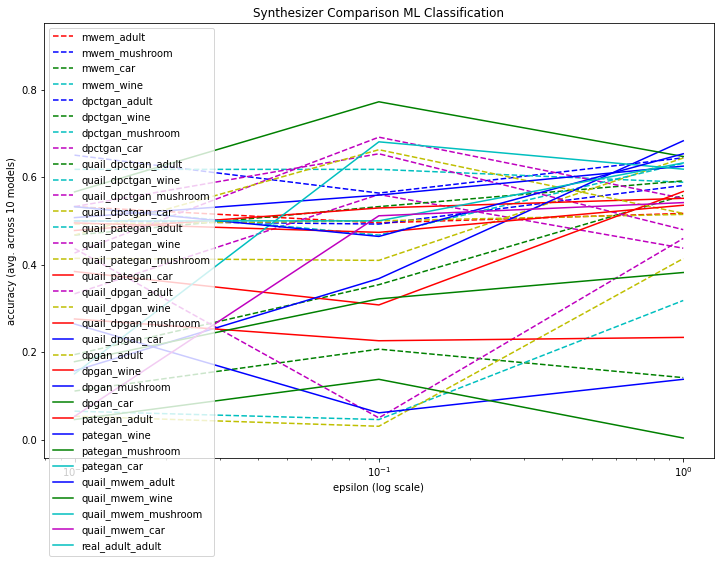

<Figure size 432x288 with 0 Axes>

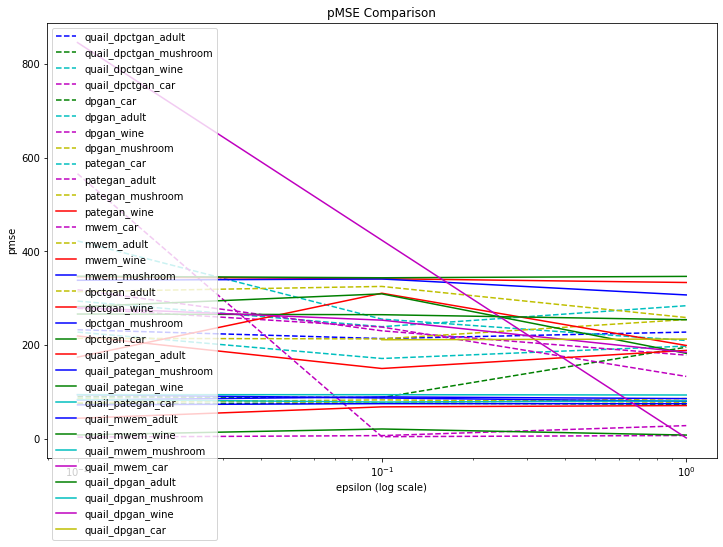

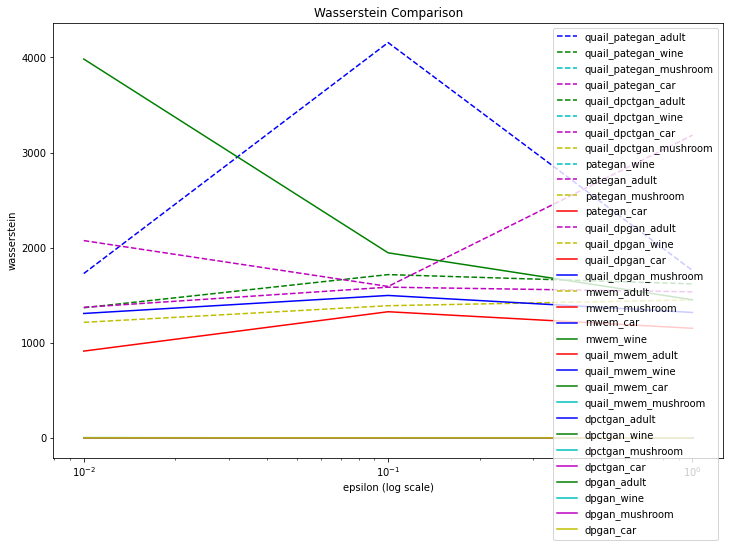

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [25]:
for d in np.unique(runs['tags.dataset'].dropna()):
    make_plots(runs, 
               {"Synthesizer Comparison ML Classification": 
                {'x':'params.epsilon', 
                 'y':'metrics.max_accuracy', 
                 'series':'params.synthesizer', 
                 'dataset':'tags.dataset',
                 'x_label': "epsilon (log scale)", 
                 'y_label': "accuracy (avg. across 10 models)"},
                "pMSE Comparison": 
                {'x':'params.pmse_epsilon', 
                 'y':'metrics.pmse_score', 
                 'series':'params.pmse_synthesizer', 
                 'dataset':'tags.pmse_dataset',
                 'x_label': "epsilon (log scale)", 
                 'y_label': "pmse"},
                "Wasserstein Comparison": 
                {'x':'params.wasserstein_epsilon', 
                 'y':'metrics.wasserstein_score', 
                 'series':'params.wasserstein_synthesizer', 
                 'dataset':'tags.wasserstein_dataset',
                 'x_label': "epsilon (log scale)", 
                 'y_label': "wasserstein"},
                "AUCROC Comparison": 
                {'x':'params.aucroc_epsilon', 
                 'y':'metrics.aucroc', 
                 'series':'params.aucroc_synthesizer', 
                 'dataset':'tags.dataset',
                 'x_label': "epsilon (log scale)", 
                 'y_label': "aucroc"}
               })